# 1. Pre-Setup

**1. DataSet:** Download the Flickr 8k Images Here and captions from [here](https://github.com/jbrownlee/Datasets/releases)

In [ ]:
! unzip 'data/Flickr8k_text.zip'

In [ ]:
! unzip 'data/Flickr8k_Dataset.zip'

In [ ]:
# Dowload the json that contains details about the captions for train, test, val split of the Flickr8k dataset
http://cs.stanford.edu/people/karpathy/deepimagesent/caption_datasets.zip

# 2. Shell

In [ ]:
! python create_input_files.py


Reading TRAIN images and captions, storing to file...

100% 6000/6000 [01:23<00:00, 72.25it/s]

Reading VAL images and captions, storing to file...

100% 1000/1000 [00:16<00:00, 61.83it/s]

Reading TEST images and captions, storing to file...

100% 1000/1000 [00:16<00:00, 62.38it/s]


In [ ]:
! python train.py

Training on cuda
0it [00:00, ?it/s]Epoch: [0][0/938]	Batch Time 2.859 (2.859)	Data Load Time 0.189 (0.189)	Loss 8.9045 (8.9045)	Top-5 Accuracy 0.000 (0.000)
100it [01:23,  1.23it/s]Epoch: [0][100/938]	Batch Time 0.805 (0.837)	Data Load Time 0.000 (0.002)	Loss 5.0182 (5.8665)	Top-5 Accuracy 42.975 (34.227)
200it [02:45,  1.22it/s]Epoch: [0][200/938]	Batch Time 0.840 (0.830)	Data Load Time 0.000 (0.001)	Loss 4.7488 (5.4139)	Top-5 Accuracy 43.532 (37.737)
300it [04:08,  1.24it/s]Epoch: [0][300/938]	Batch Time 0.796 (0.828)	Data Load Time 0.000 (0.001)	Loss 4.5352 (5.1416)	Top-5 Accuracy 50.543 (40.960)
400it [05:30,  1.21it/s]Epoch: [0][400/938]	Batch Time 0.811 (0.826)	Data Load Time 0.000 (0.001)	Loss 4.2048 (4.9495)	Top-5 Accuracy 54.450 (43.412)
500it [06:52,  1.24it/s]Epoch: [0][500/938]	Batch Time 0.806 (0.825)	Data Load Time 0.000 (0.001)	Loss 4.3226 (4.7991)	Top-5 Accuracy 53.699 (45.235)
600it [08:15,  1.23it/s]Epoch: [0][600/938]	Batch Time 0.813 (0.825)	Data Load Time 0.000 (0.

**Note: I won't be training it further as the projected time for completions of 100 epochs would be 25hrs on colab.** 

**The training for these few epochs simply means that that code for training the model works and can be used for several datasets like COCO, flickr8k, flickr30k.**

###**To resume training at a checkpoint, point to the corresponding file with the checkpoint parameter at the beginning of the code.**

a young boy kicking a soccer ball on a field


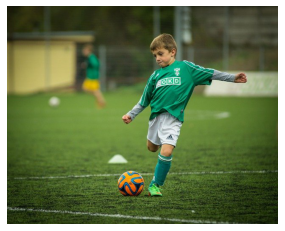

In [51]:
%run caption.py --img='images/child_playing_soccer.jpg' --model='BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar' --word_map='data_output/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json' --beam_size=5

In [56]:
%run evaluate.py

EVALUATING AT BEAM SIZE 1: 100%|██████████| 5000/5000 [05:58<00:00, 13.93it/s]



BLEU-4 score @ beam size of 1 is 0.1951.


In [58]:
%run evaluate.py

Enter Beam Size:3


EVALUATING AT BEAM SIZE 3: 100%|██████████| 5000/5000 [06:58<00:00, 11.94it/s]



BLEU-4 score @ beam size of 3 is 0.0204.


# 4. Code Testing

In [ ]:
import torch
import numpy as np

In [ ]:
a = torch.rand((2,2))
a

tensor([[0.1401, 0.8632],
        [0.1267, 0.5118]])

In [ ]:
print(a.unsqueeze(1).shape)
b = a.unsqueeze(1)
b

torch.Size([2, 1, 2])


tensor([[[0.1401, 0.8632]],

        [[0.1267, 0.5118]]])

In [ ]:
print(a.unsqueeze(2).shape)
c = a.unsqueeze(2)
c

torch.Size([2, 2, 1])


tensor([[[0.1401],
         [0.8632]],

        [[0.1267],
         [0.5118]]])

In [ ]:
a = torch.tensor([1,2,3])
print(a, a.size())
a = a.unsqueeze(1)
print(a, a.size())

tensor([1, 2, 3]) torch.Size([3])
tensor([[1],
        [2],
        [3]]) torch.Size([3, 1])


**Sorting a Tensor**

In [ ]:
tensor_1 = torch.rand(10)
tensor_1

tensor([0.2360, 0.1983, 0.3077, 0.0657, 0.8710, 0.2711, 0.9060, 0.1567, 0.3238,
        0.5599])

In [ ]:
sorted_tensor, sorted_indices = tensor_1.sort(dim=0, descending=True)

In [ ]:
sorted_tensor

tensor([0.9060, 0.8710, 0.5599, 0.3238, 0.3077, 0.2711, 0.2360, 0.1983, 0.1567,
        0.0657])

In [ ]:
sorted_indices

tensor([6, 4, 9, 8, 2, 5, 0, 1, 7, 3])

**Mean**

In [ ]:
a = torch.randint(1,10,(2,3,5),dtype=torch.float32)
a

tensor([[[9., 1., 8., 6., 5.],
         [6., 2., 4., 3., 4.],
         [4., 5., 2., 1., 9.]],

        [[5., 1., 4., 7., 5.],
         [6., 9., 1., 7., 9.],
         [2., 2., 5., 7., 6.]]])

In [ ]:
a.mean(dim=1)

tensor([[6.3333, 2.6667, 4.6667, 3.3333, 6.0000],
        [4.3333, 4.0000, 3.3333, 7.0000, 6.6667]])

**Multiplying tensors**

In [ ]:
a = torch.randint(1,10,(2,5))
b = torch.randint(1,10,(2,5))
print(a)
print(b)

tensor([[7, 7, 4, 9, 8],
        [2, 9, 8, 2, 6]])
tensor([[6, 9, 5, 7, 3],
        [7, 6, 6, 5, 7]])


In [ ]:
a * b

tensor([[42, 63, 20, 63, 24],
        [14, 54, 48, 10, 42]])

In [ ]:
a

tensor([[7, 7, 4, 9, 8],
        [2, 9, 8, 2, 6]])

**Concat**

In [ ]:
a = torch.rand((3,4,5))
a

tensor([[[0.6013, 0.0792, 0.5712, 0.0959, 0.0069],
         [0.9349, 0.8185, 0.3694, 0.5370, 0.8208],
         [0.5262, 0.3663, 0.4970, 0.6357, 0.9704],
         [0.0733, 0.0995, 0.7941, 0.3984, 0.5036]],

        [[0.2877, 0.1849, 0.0686, 0.3866, 0.7017],
         [0.7579, 0.6945, 0.8291, 0.6014, 0.9614],
         [0.5388, 0.0243, 0.9227, 0.9820, 0.4068],
         [0.8603, 0.2324, 0.8609, 0.3871, 0.0994]],

        [[0.6755, 0.7774, 0.0038, 0.7501, 0.1662],
         [0.0106, 0.6241, 0.0999, 0.4197, 0.5937],
         [0.5380, 0.7000, 0.3105, 0.5550, 0.1571],
         [0.2095, 0.7894, 0.9028, 0.4161, 0.8712]]])

In [ ]:
b = a[:2,1,:]
b

tensor([[0.9349, 0.8185, 0.3694, 0.5370, 0.8208],
        [0.7579, 0.6945, 0.8291, 0.6014, 0.9614]])

In [ ]:
c = torch.rand((2,10))
c

tensor([[0.0879, 0.3594, 0.2045, 0.2862, 0.7910, 0.9090, 0.4433, 0.6211, 0.3394,
         0.1819],
        [0.6075, 0.4998, 0.0589, 0.6839, 0.3910, 0.6096, 0.3900, 0.8347, 0.5971,
         0.8097]])

In [ ]:
concat_tensor = torch.cat((b,c),dim=1)
concat_tensor

tensor([[0.9349, 0.8185, 0.3694, 0.5370, 0.8208, 0.0879, 0.3594, 0.2045, 0.2862,
         0.7910, 0.9090, 0.4433, 0.6211, 0.3394, 0.1819],
        [0.7579, 0.6945, 0.8291, 0.6014, 0.9614, 0.6075, 0.4998, 0.0589, 0.6839,
         0.3910, 0.6096, 0.3900, 0.8347, 0.5971, 0.8097]])

In [ ]:
print(b.size(),c.size(),concat_tensor.size())

torch.Size([2, 5]) torch.Size([2, 10]) torch.Size([2, 15])


Example 2:

In [ ]:
a = torch.rand((5,1))
print(a)
b = torch.rand((5,1))
print(b)
c = torch.cat([a, b], dim=1)
print(c)

tensor([[0.3238],
        [0.4503],
        [0.7950],
        [0.3629],
        [0.5639]])
tensor([[0.4646],
        [0.6180],
        [0.3030],
        [0.7084],
        [0.4040]])
tensor([[0.3238, 0.4646],
        [0.4503, 0.6180],
        [0.7950, 0.3030],
        [0.3629, 0.7084],
        [0.5639, 0.4040]])


**pack_padded_sequence**

In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable

batch_size = 3
max_length = 3

input_tensor = torch.zeros(batch_size,max_length)
input_tensor[0] = torch.FloatTensor([1,2,3])
input_tensor[1] = torch.FloatTensor([4,5,0])
input_tensor[2] = torch.FloatTensor([6,0,0])
print(f'Input Tensor \n{input_tensor}')

batch_in = Variable(input_tensor)
seq_lengths = [3,2,1]
pack= torch.nn.utils.rnn.pack_padded_sequence(batch_in, seq_lengths, batch_first=True)
print (pack)

Input Tensor 
tensor([[1., 2., 3.],
        [4., 5., 0.],
        [6., 0., 0.]])
PackedSequence(data=tensor([1., 4., 6., 2., 5., 3.]), batch_sizes=tensor([3, 2, 1]), sorted_indices=None, unsorted_indices=None)


In [ ]:
pack.data

tensor([1., 4., 6., 2., 5., 3.])

**clamp_** 

In [ ]:
a = torch.rand((1,5))
a

tensor([[0.3649, 0.2279, 0.9351, 0.4523, 0.4387]])

In [ ]:
a.clamp_(0.3,0.4)

tensor([[0.3649, 0.3000, 0.4000, 0.4000, 0.4000]])

**topk**



```
torch.topk(input, k, dim=None, largest=True, sorted=True, out=None) -> (Tensor, LongTensor)

```

* input (Tensor) – the input tensor.

* k (int) – the k in “top-k”

* dim (int, optional) – the dimension to sort along

* largest (bool, optional) – controls whether to return largest or smallest elements

* sorted (bool, optional) – controls whether to return the elements in sorted order

* out (tuple, optional) – the output tuple of (Tensor, LongTensor) that can be optionally given to be used as output buffers



In [ ]:
a = torch.rand((1,10))
a

tensor([[0.4044, 0.6217, 0.3312, 0.2320, 0.1827, 0.6978, 0.8742, 0.6769, 0.6243,
         0.9066]])

In [ ]:
a.topk(3,1,True,True)

torch.return_types.topk(values=tensor([[0.9066, 0.8742, 0.6978]]), indices=tensor([[9, 6, 5]]))

**expand_as**

In [ ]:
a = torch.rand(2, 3)
b = torch.rand(2,2, 3)
print('a:',a)
print(a.size(),'\n')
print('b:',b)
print(b.size(),'\n')
c = a.expand_as(b)
print('c:',c)
print(c.size())

a: tensor([[0.5857, 0.3732, 0.3363],
        [0.2305, 0.5296, 0.0939]])
torch.Size([2, 3]) 

b: tensor([[[0.4305, 0.4382, 0.3205],
         [0.7792, 0.2424, 0.5716]],

        [[0.0296, 0.1529, 0.5923],
         [0.1488, 0.5769, 0.1008]]])
torch.Size([2, 2, 3]) 

c: tensor([[[0.5857, 0.3732, 0.3363],
         [0.2305, 0.5296, 0.0939]],

        [[0.5857, 0.3732, 0.3363],
         [0.2305, 0.5296, 0.0939]]])
torch.Size([2, 2, 3])


In [ ]:
import torch
a = torch.rand((5,1))
print(a,a.size())
b = torch.rand((5,10))
print(b,b.size())
c=  a.expand_as(b)
print(c,c.size())

tensor([[0.1603],
        [0.7443],
        [0.0328],
        [0.7701],
        [0.3885]]) torch.Size([5, 1])
tensor([[0.6735, 0.4823, 0.0127, 0.8541, 0.5889, 0.5686, 0.3911, 0.0200, 0.4276,
         0.6151],
        [0.4231, 0.1330, 0.3226, 0.3189, 0.9538, 0.3065, 0.0133, 0.5985, 0.2860,
         0.7626],
        [0.8643, 0.3504, 0.8027, 0.2607, 0.0358, 0.6715, 0.0687, 0.0071, 0.2876,
         0.5845],
        [0.3629, 0.6429, 0.2947, 0.4038, 0.9086, 0.9576, 0.1772, 0.7318, 0.5136,
         0.9869],
        [0.7127, 0.7106, 0.8317, 0.9093, 0.0738, 0.5960, 0.0098, 0.5232, 0.3364,
         0.3320]]) torch.Size([5, 10])
tensor([[0.1603, 0.1603, 0.1603, 0.1603, 0.1603, 0.1603, 0.1603, 0.1603, 0.1603,
         0.1603],
        [0.7443, 0.7443, 0.7443, 0.7443, 0.7443, 0.7443, 0.7443, 0.7443, 0.7443,
         0.7443],
        [0.0328, 0.0328, 0.0328, 0.0328, 0.0328, 0.0328, 0.0328, 0.0328, 0.0328,
         0.0328],
        [0.7701, 0.7701, 0.7701, 0.7701, 0.7701, 0.7701, 0.7701, 0.7701, 0.77

**tensor.view(-1)**

In [ ]:
import torch
a = torch.rand((2,10))
print(a)
a.view(-1)

tensor([[0.2254, 0.2547, 0.2791, 0.6609, 0.5827, 0.4487, 0.9770, 0.6600, 0.0294,
         0.1755],
        [0.6716, 0.1008, 0.1677, 0.2579, 0.1820, 0.9039, 0.5059, 0.4682, 0.8118,
         0.3487]])


tensor([0.2254, 0.2547, 0.2791, 0.6609, 0.5827, 0.4487, 0.9770, 0.6600, 0.0294,
        0.1755, 0.6716, 0.1008, 0.1677, 0.2579, 0.1820, 0.9039, 0.5059, 0.4682,
        0.8118, 0.3487])